# Poisson discrete count model for MTurk demographics

In [1]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

df = pd.DataFrame.from_csv("mturk_surveys.csv",index_col=None)
df.gender[df.gender=='Female']='female'
df.head()

,Unnamed: 0,gender,hit_answered_date,hit_creation_date,household_income,household_size,location_city,location_country,location_region,marital_status,post_to_completion_secs,worker_id,year_of_birth
0,0,female,2016-09-14 17:37:11.297,2016-09-14 17:35:14.000,"$40,000-$59,999",1,mount holly,US,nj,divorced,117.0,a013d8ba79229f477b5b045bf35c7d57,1956
1,1,male,2016-09-14 17:29:09.539,2016-09-14 17:20:14.000,"Less than $10,000",2,pune,IN,mh,single,535.0,4958cd4059bd09a144c2698d50f5bc60,1992
2,2,female,2016-09-14 17:13:35.428,2016-09-14 16:20:14.000,"Less than $10,000",4,caracas,VE,a,divorced,3201.0,0a79a3e3ea28284e7a92ce0ddaa05e06,1978
3,3,female,2016-09-14 17:10:54.723,2016-09-14 17:05:13.000,"$75,000-$99,999",3,scottsdale,US,az,cohabitating,341.0,1079d94e2374ade52af1de09232c9797,1963
4,4,male,2016-09-14 16:52:20.792,2016-09-14 16:50:13.000,"Less than $10,000",4,ambala,IN,hr,single,127.0,897b71b78803b47bc19d0d31ff91856e,1993


In [2]:
# By grouping by the informations, count the number of times each user working on the MTurk

df1 = df.groupby(['worker_id','gender','household_income','marital_status','household_size',
                  'location_country','year_of_birth']).size().sort_values()
df1=df1.reset_index()
df1.columns= ['worker_id','gender','household_income','marital_status','household_size',
              'location_country','year_of_birth','number_of_times']
df1.head()

,worker_id,gender,household_income,marital_status,household_size,location_country,year_of_birth,number_of_times
0,0000ceeb6c91d4a1a53fec0de0cc3460,female,"$25,000-$39,999",single,1,US,1987,1
1,a14593ac153cc79be3b39dd5d7c92b10,male,"Less than $10,000",married,3,IN,1987,1
2,a14301a628ff22093311bd67a3b4377e,male,"$40,000-$59,999",married,2,DE,1982,1
3,a14301a628ff22093311bd67a3b4377e,male,"$40,000-$59,999",cohabitating,2,DE,1981,1
4,a14301a628ff22093311bd67a3b4377e,male,"$100,000 or more",married,3,DE,1980,1


In [3]:
# Through preprocessing, encode the categorical strings into categorical number 
# Additionally, get the 'year_of_birth' in decade version

g = pd.get_dummies(df1.gender)
hi = pd.get_dummies(df1.household_income)
ms = pd.get_dummies(df1.marital_status)
hs = pd.get_dummies(df1.household_size)
lc = pd.get_dummies(df1.location_country)
yb = df1.year_of_birth//10*10
enc = pd.concat([g,hi,ms,hs,lc,yb],axis=1)
enc.head()

,female,male,"$10,000-$14,999","$100,000 or more","$15,000-$24,999","$25,000-$39,999","$40,000-$59,999","$60,000-$74,999","$75,000-$99,999","Less than $10,000",...,US,UY,VE,VI,VN,ZA,ZM,ZW,ZZ,year_of_birth
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980


In [4]:
# Running Poisson regression based on all categorical data
from statsmodels.discrete.discrete_model import Poisson
ps_gender = Poisson(df1.number_of_times,enc).fit()
ps_gender.summary()

         Current function value: 1.413263
         Iterations: 35


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:        number_of_times   No. Observations:                36497
Model:                        Poisson   Df Residuals:                    36343
Method:                           MLE   Df Model:                          153
Date:                Fri, 21 Oct 2016   Pseudo R-squ.:                0.007259
Time:                        16:34:25   Log-Likelihood:                -51580.
converged:                      False   LL-Null:                       -51957.
                                        LLR p-value:                 3.053e-80
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
female                8.0611   2.75e+05   2.94e-05      1.000     -5.38e+05  5.38e+05
male                  8.0582   2.75e+05   2.93e-05      1.000     -5.38e+05  5.38e+05
$10,000-$14,999       1.8321   9.47e+05   1.93e-06      1.000     -1.86e+06  1.86e+06
$100,000 or more      1.9042   9.53e+05      2e-06      1.000     -1.87e+06  1.87e+06
$15,000-$24,999       1.8840   9.48e+05   1.99e-06      1.000     -1.86e+06  1.86e+06
$25,000-$39,999       1.9132    9.5e+05   2.01e-06      1.000     -1.86e+06  1.86e+06
$40,000-$59,999       1.9239    9.4e+05   2.05e-06      1.000     -1.84e+06  1.84e+06
$60,000-$74,999       1.8873   9.49e+05   1.99e-06      1.000     -1.86e+06  1.86e+06
$75,000-$99,999       1.8870   9.61e+05   1.96e-06      1.000     -1.88e+06  1.88e+06
Less than $10,000     1.9646   9.52e+05   2.06e-06      1.000     -1.87e+06  1.87e+06
None                  2.2365        nan        nan        nan           nan       nan
cohabitating          2.1085        nan        nan        nan           nan       nan
divorced              2.0472        nan        nan        nan           nan       nan
engaged               2.0164        nan        nan        nan           nan       nan
married               2.1557   2.57e+05   8.39e-06      1.000     -5.04e+05  5.04e+05
separated             1.5714        nan        nan        nan           nan       nan
single                2.1224        nan        nan        nan           nan       nan
widowed               1.5850        nan        nan        nan           nan       nan
1                     3.1990   5.49e+05   5.82e-06      1.000     -1.08e+06  1.08e+06
2                     3.1498   6.75e+05   4.67e-06      1.000     -1.32e+06  1.32e+06
3                     3.1685   4.49e+05   7.06e-06      1.000     -8.79e+05  8.79e+05
4                     3.1460   3.29e+05   9.56e-06      1.000     -6.45e+05  6.45e+05
5+                    3.1674   4.33e+05   7.32e-06      1.000     -8.48e+05  8.48e+05
AE                    0.1578        nan        nan        nan           nan       nan
AF                   -0.0562        nan        nan        nan           nan       nan
AG                    0.0018        nan        nan        nan           nan       nan
AL                    0.6416        nan        nan        nan           nan       nan
AR                    0.0007        nan        nan        nan           nan       nan
AT                   -0.0810        nan        nan        nan           nan       nan
AU                    0.0034        nan        nan        nan           nan       nan
AZ                   -0.0729        nan        nan        nan           nan       nan
BA                   -0.0072        nan        nan        nan           nan       nan
BB                   -0.0356        nan        nan        nan           nan       nan
BD                    0.3624        nan        nan        nan           nan       nan
BE                    0.0465        nan        nan        n

As there are too many independent variables, the regression can't converges, we try to narrow down the country and marital status into a more general group

In [5]:
# Group the country information into three categories - "US", "IN", "Other"
df1.location_country[(df1.location_country!='US')&(df1.location_country!='IN')]='Other'
df1.location_country.head()

0       US
1       IN
2    Other
3    Other
4    Other
Name: location_country, dtype: object

In [6]:
# Group the marital information into two categories - "married", "single"
df1.marital_status[df1.marital_status!='married']='single'
df1.marital_status.head()

0     single
1    married
2    married
3     single
4    married
Name: marital_status, dtype: object

In [7]:
# Try the above encoding method to fit the model
ms = pd.get_dummies(df1.marital_status)
lc = pd.get_dummies(df1.location_country)
enc_1 = pd.concat([g,hi,ms,hs,lc,yb],axis=1)
enc_1.head()

,female,male,"$10,000-$14,999","$100,000 or more","$15,000-$24,999","$25,000-$39,999","$40,000-$59,999","$60,000-$74,999","$75,000-$99,999","Less than $10,000",...,single,1,2,3,4,5+,IN,Other,US,year_of_birth
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1980
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1980
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1980
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1980
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1980


In [8]:
# Running Poisson regression based on all categorical data

from statsmodels.discrete.discrete_model import Poisson
ps_gender = Poisson(df1.number_of_times,enc_1).fit()
ps_gender.summary()

         Current function value: 1.414553
         Iterations: 35


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:        number_of_times   No. Observations:                36497
Model:                        Poisson   Df Residuals:                    36480
Method:                           MLE   Df Model:                           16
Date:                Fri, 21 Oct 2016   Pseudo R-squ.:                0.006353
Time:                        16:34:32   Log-Likelihood:                -51627.
converged:                      False   LL-Null:                       -51957.
                                        LLR p-value:                3.774e-130
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
female                4.6155        nan        nan        nan           nan       nan
male                  4.6159        nan        nan        nan           nan       nan
$10,000-$14,999       1.0953   6.04e+05   1.81e-06      1.000     -1.18e+06  1.18e+06
$100,000 or more      1.1679   6.17e+05   1.89e-06      1.000     -1.21e+06  1.21e+06
$15,000-$24,999       1.1463   6.21e+05   1.85e-06      1.000     -1.22e+06  1.22e+06
$25,000-$39,999       1.1751   5.85e+05   2.01e-06      1.000     -1.15e+06  1.15e+06
$40,000-$59,999       1.1863   6.19e+05   1.92e-06      1.000     -1.21e+06  1.21e+06
$60,000-$74,999       1.1490   6.27e+05   1.83e-06      1.000     -1.23e+06  1.23e+06
$75,000-$99,999       1.1503   6.22e+05   1.85e-06      1.000     -1.22e+06  1.22e+06
Less than $10,000     1.2297   5.99e+05   2.05e-06      1.000     -1.17e+06  1.17e+06
married               4.1009        nan        nan        nan           nan       nan
single                4.0470        nan        nan        nan           nan       nan
1                     1.8038   6.78e+04   2.66e-05      1.000     -1.33e+05  1.33e+05
2                     1.7472   7.05e+04   2.48e-05      1.000     -1.38e+05  1.38e+05
3                     1.7686   6.83e+04   2.59e-05      1.000     -1.34e+05  1.34e+05
4                     1.7463   6.72e+04    2.6e-05      1.000     -1.32e+05  1.32e+05
5+                    1.7671   6.94e+04   2.55e-05      1.000     -1.36e+05  1.36e+05
IN                    3.0114   2.52e+05    1.2e-05      1.000     -4.93e+05  4.93e+05
Other                 2.8035   2.52e+05   1.11e-05      1.000     -4.93e+05  4.93e+05
US                    2.9539   2.52e+05   1.17e-05      1.000     -4.93e+05  4.93e+05
year_of_birth        -0.0072      0.000    -17.634      0.000        -0.008    -0.006
=====================================================================================
"""

As the regression still can't converges, we try again to narrow down the features.

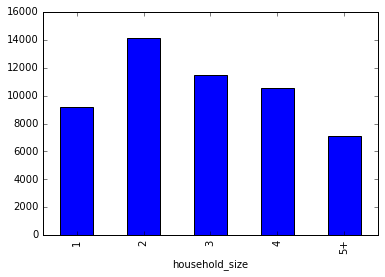

In [9]:
df.groupby(df['household_size']).size().plot(kind='bar')

In [10]:
# Group the household size information into two categories - "1-3", "4+"
df1.household_size[(df1.household_size!='4')&(df1.household_size!='5+')]='1-3'
df1.household_size[(df1.household_size=='4')|(df1.household_size=='5+')]='4+'
df1.household_size.head()

0    1-3
1    1-3
2    1-3
3    1-3
4    1-3
Name: household_size, dtype: object

In [11]:
# Try the above encoding method to fit the model
hs = pd.get_dummies(df1.household_size)
enc_2 = pd.concat([g,hi,ms,hs,lc,yb],axis=1)
enc_2.head()

,female,male,"$10,000-$14,999","$100,000 or more","$15,000-$24,999","$25,000-$39,999","$40,000-$59,999","$60,000-$74,999","$75,000-$99,999","Less than $10,000",married,single,1-3,4+,IN,Other,US,year_of_birth
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1980
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1980
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1980
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1980
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1980


In [12]:
# Running Poisson regression based on all categorical data

from statsmodels.discrete.discrete_model import Poisson
ps_gender = Poisson(df1.number_of_times,enc_2).fit()
ps_gender.summary()

         Current function value: 1.414797
         Iterations: 35


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:        number_of_times   No. Observations:                36497
Model:                        Poisson   Df Residuals:                    36483
Method:                           MLE   Df Model:                           13
Date:                Fri, 21 Oct 2016   Pseudo R-squ.:                0.006182
Time:                        16:34:40   Log-Likelihood:                -51636.
converged:                      False   LL-Null:                       -51957.
                                        LLR p-value:                6.893e-129
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
female                3.7766        nan        nan        nan           nan       nan
male                  3.7789        nan        nan        nan           nan       nan
$10,000-$14,999       0.8711        nan        nan        nan           nan       nan
$100,000 or more      0.9347        nan        nan        nan           nan       nan
$15,000-$24,999       0.9203        nan        nan        nan           nan       nan
$25,000-$39,999       0.9475        nan        nan        nan           nan       nan
$40,000-$59,999       0.9567        nan        nan        nan           nan       nan
$60,000-$74,999       0.9174        nan        nan        nan           nan       nan
$75,000-$99,999       0.9181        nan        nan        nan           nan       nan
Less than $10,000     1.0086        nan        nan        nan           nan       nan
married               3.7852   2.82e+05   1.34e-05      1.000     -5.52e+05  5.52e+05
single                3.7404   2.82e+05   1.33e-05      1.000     -5.52e+05  5.52e+05
1-3                   3.8063        nan        nan        nan           nan       nan
4+                    3.7952        nan        nan        nan           nan       nan
IN                    2.6046        nan        nan        nan           nan       nan
Other                 2.3985        nan        nan        nan           nan       nan
US                    2.5512        nan        nan        nan           nan       nan
year_of_birth        -0.0073      0.000    -18.115      0.000        -0.008    -0.007
=====================================================================================
"""

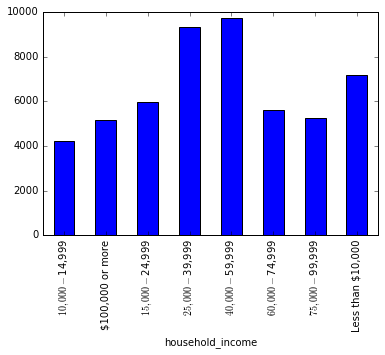

In [13]:
df.groupby(df['household_income']).size().plot(kind='bar')

In [14]:
# Group the household size information into three categories - "less than $10,000", "10,000-100,00","$100,000 or more"
df1.household_income[(df1.household_income!='Less than $10,000')&(df1.household_income!='$100,000 or more')]='10,000-100,000'
df1.household_income.head()

0       10,000-100,000
1    Less than $10,000
2       10,000-100,000
3       10,000-100,000
4     $100,000 or more
Name: household_income, dtype: object

In [15]:
hi = pd.get_dummies(df1.household_income)
enc_3 = pd.concat([g,hi,ms,hs,lc,yb],axis=1)
enc_3.head()

,female,male,"$100,000 or more","10,000-100,000","Less than $10,000",married,single,1-3,4+,IN,Other,US,year_of_birth
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1980
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1980
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1980
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1980
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1980


In [16]:
# Running Poisson regression based on all categorical data

from statsmodels.discrete.discrete_model import Poisson
ps_gender = Poisson(df1.number_of_times,enc_3).fit()
ps_gender.summary()

         Current function value: 1.415148
         Iterations: 35


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:        number_of_times   No. Observations:                36497
Model:                        Poisson   Df Residuals:                    36488
Method:                           MLE   Df Model:                            8
Date:                Fri, 21 Oct 2016   Pseudo R-squ.:                0.005935
Time:                        16:34:46   Log-Likelihood:                -51649.
converged:                      False   LL-Null:                       -51957.
                                        LLR p-value:                5.797e-128
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
female                4.4323   2.73e+04      0.000      1.000     -5.35e+04  5.35e+04
male                  4.4346   4.59e+04   9.66e-05      1.000     -8.99e+04  8.99e+04
$100,000 or more      1.5851   1.26e+05   1.25e-05      1.000     -2.48e+05  2.48e+05
10,000-100,000        1.5816   1.26e+05   1.26e-05      1.000     -2.47e+05  2.47e+05
Less than $10,000     1.6666   1.28e+05    1.3e-05      1.000     -2.51e+05  2.51e+05
married               3.0918   2.15e+05   1.44e-05      1.000     -4.21e+05  4.21e+05
single                3.0449   2.15e+05   1.41e-05      1.000     -4.22e+05  4.22e+05
1-3                   3.4224        nan        nan        nan           nan       nan
4+                    3.4120        nan        nan        nan           nan       nan
IN                    2.3560   1.36e+05   1.74e-05      1.000     -2.66e+05  2.66e+05
Other                 2.1606   1.36e+05   1.59e-05      1.000     -2.66e+05  2.66e+05
US                    2.3180   1.36e+05   1.71e-05      1.000     -2.66e+05  2.66e+05
year_of_birth        -0.0073      0.000    -18.117      0.000        -0.008    -0.007
=====================================================================================
"""